# demo01_波士顿地区房屋价格预测

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as sd
import pandas as pd

In [48]:
# 加载数据集
boston = sd.load_boston()
print(boston.data.shape, boston.target.shape)
print(boston.data[0], boston.target[0])

(506, 13) (506,)
[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00] 24.0


In [49]:
# 针对当前数据集，做简单数据分析， 看一下样本数据分布关系
data = pd.DataFrame(boston.data, columns=boston.feature_names)
# data.info()
# data.describe()
data['TARGET'] = boston.target
data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


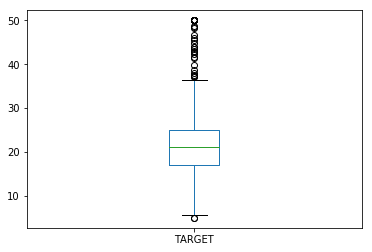

In [50]:
data['TARGET'].plot.box()

In [51]:
data['CHAS'].value_counts()
data.pivot_table(index='CHAS', values='TARGET')

,TARGET
CHAS,
0.0,22.093843
1.0,28.440000


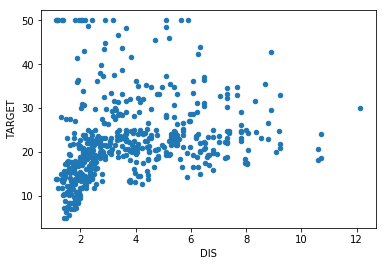

In [52]:
# 观察特征与房价之间的关系
data.plot.scatter(x='DIS', y='TARGET')

## 训练回归模型，预测房屋价格

In [53]:
import sklearn.model_selection as ms

# 1. 整理输入集、输出集
x, y = data.loc[:, :'LSTAT'], data['TARGET']
# 2. 拆分测试集、训练集
# random_state: 随机种子，使用相同的种子做多次随机拆分，会得到相同的结果
train_x, test_x, train_y, test_y = \
    ms.train_test_split(x, y, test_size=0.2, random_state=7)
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((404, 13), (404,), (102, 13), (102,))

In [54]:
# 3. 使用训练集训练模型、使用测试集测试模型，输出模型得分
import sklearn.linear_model as lm
import sklearn.metrics as sm

model = lm.LinearRegression()
model.fit(train_x, train_y)
# 评估
pred_train_y = model.predict(train_x)
pred_test_y = model.predict(test_x)
print('Training r2:', sm.r2_score(train_y, pred_train_y))
print('Testing r2:', sm.r2_score(test_y, pred_test_y))

Training r2: 0.7697199562902917
Testing r2: 0.5792176190651537


In [55]:
# 岭回归
import sklearn.linear_model as lm
import sklearn.metrics as sm

model = lm.Ridge(100)
model.fit(train_x, train_y)
# 评估
pred_train_y = model.predict(train_x)
pred_test_y = model.predict(test_x)
print('Training r2:', sm.r2_score(train_y, pred_train_y))
print('Testing r2:', sm.r2_score(test_y, pred_test_y))

Training r2: 0.7359528637144759
Testing r2: 0.6536412499609423


In [56]:
# 多项式回归
import sklearn.linear_model as lm
import sklearn.metrics as sm
import sklearn.preprocessing as sp
import sklearn.pipeline as pl

model = pl.make_pipeline(sp.PolynomialFeatures(2), lm.Ridge(500))
model.fit(train_x, train_y)
# 评估
pred_train_y = model.predict(train_x)
pred_test_y = model.predict(test_x)
print('Training r2:', sm.r2_score(train_y, pred_train_y))
print('Testing r2:', sm.r2_score(test_y, pred_test_y))

Training r2: 0.9182191175542828
Testing r2: 0.7614461046352334


In [57]:
model.get_params()['ridge'].coef_

array([ 0.00000000e+00,  2.96566806e-03, -9.98738357e-02,  8.26785713e-03,
       -2.20495115e-03,  1.88994979e-03,  1.81554811e-02,  1.98632405e-01,
       -1.44847925e-02,  1.40785147e-02, -5.28540686e-02, -1.20594529e-02,
        7.80101756e-02,  3.32773042e-02,  2.05529154e-03,  1.02363919e-01,
        5.79694976e-02,  1.19970132e-02, -2.22914415e-02, -4.68992016e-02,
       -5.39762090e-03, -7.75418187e-02, -7.00551393e-02,  1.94792976e-03,
       -2.62199413e-03,  1.30972307e-04, -2.23437648e-03, -5.08993191e-05,
       -3.56156601e-03, -3.54118076e-02, -3.01080854e-02,  4.51567455e-02,
       -4.15680988e-04, -8.27343655e-03, -1.14222367e-03,  3.69002284e-04,
        6.44946606e-04, -5.68742010e-04, -6.00808084e-04,  2.94091469e-02,
       -7.75755679e-02,  1.78055081e-02,  1.27958662e-02,  5.88806846e-03,
        3.91935338e-02,  2.85620370e-02,  1.00494793e-03, -6.20563646e-02,
       -5.22053011e-04, -3.65209449e-02, -2.20495115e-03, -6.19626545e-03,
       -2.30758852e-02, -

## 决策树回归

In [58]:
# 决策树回归
import sklearn.metrics as sm
import sklearn.tree as st

# 如果出现了过拟合情况：
# 把max_depth调低一点、把min_samples_split调高一点
model = st.DecisionTreeRegressor(
        max_depth=6, min_samples_split=5)
model.fit(train_x, train_y)
# 评估
pred_train_y = model.predict(train_x)
pred_test_y = model.predict(test_x)
print('Training r2:', sm.r2_score(train_y, pred_train_y))
print('Testing r2:', sm.r2_score(test_y, pred_test_y))

Training r2: 0.9454133594787815
Testing r2: 0.6860471545014241


### 决策树的可视化


In [59]:
# import graphviz
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz 2.44.1/bin' # 引入路径

# dot_data = st.export_graphviz(model, out_file=None, 
#                               feature_names = boston.feature_names, 
#                               filled = True, rounded = True)
# graph = graphviz.Source(dot_data)
# graph

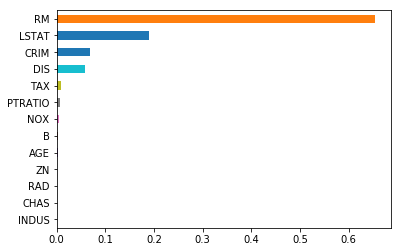

In [60]:
fi = model.feature_importances_
fi = pd.Series(fi, index=boston.feature_names)
fi.sort_values().plot.barh()

## 集合算法-AdaBoost

In [61]:
import sklearn.ensemble as se
import sklearn.tree as st

model = st.DecisionTreeRegressor(max_depth=5)
model = se.AdaBoostRegressor(
            model, n_estimators=80, random_state=7)
model.fit(train_x, train_y)
pred_train_y = model.predict(train_x)
pred_test_y = model.predict(test_x)
print('Training r2:', sm.r2_score(train_y, pred_train_y))
print('Testing r2:', sm.r2_score(test_y, pred_test_y))

Training r2: 0.9697100638324825
Testing r2: 0.8420244573711309


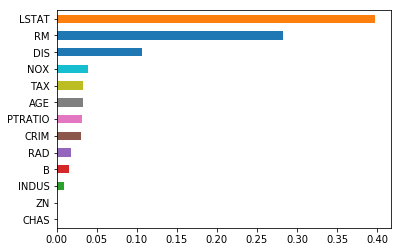

In [62]:
fi = model.feature_importances_
fi = pd.Series(fi, index=boston.feature_names)
fi.sort_values().plot.barh()

## 集合算法-GBDT

In [77]:
model = se.GradientBoostingRegressor(
    max_depth=3, n_estimators=80, min_samples_split=3)
model.fit(train_x, train_y)
pred_train_y = model.predict(train_x)
pred_test_y = model.predict(test_x)
print('Training r2:', sm.r2_score(train_y, pred_train_y))
print('Testing r2:', sm.r2_score(test_y, pred_test_y))
print('Testing MAE:', sm.mean_absolute_error(test_y, pred_test_y))

Training r2: 0.9728388126897038
Testing r2: 0.8520732666345684
Testing MAE: 2.208042427703373
